In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', parse_dates=['Date'])

df['Total Cases']= df[['Confirmed','Recovered','Deaths']].sum(axis=1)
df.head()

Date      Country  Confirmed  Recovered  Deaths  Total Cases
0 2020-01-22  Afghanistan          0          0       0            0
1 2020-01-23  Afghanistan          0          0       0            0
2 2020-01-24  Afghanistan          0          0       0            0
3 2020-01-25  Afghanistan          0          0       0            0
4 2020-01-26  Afghanistan          0          0       0            0

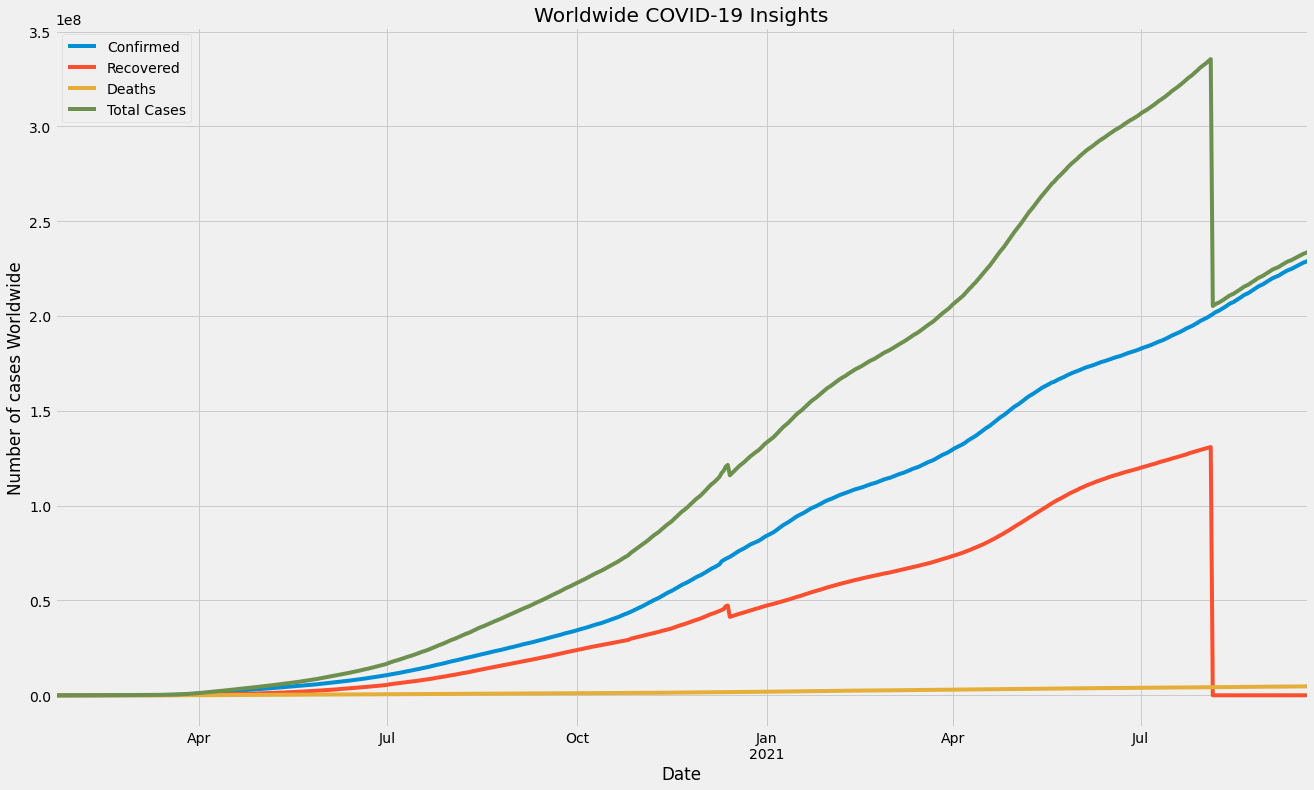

In [10]:
# Worldwide Cases
worldwide_df=df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize=(20,12))
w.set_xlabel('Date')
w.set_ylabel('Number of cases Worldwide')
w.title.set_text('Worldwide COVID-19 Insights')

plt.show()

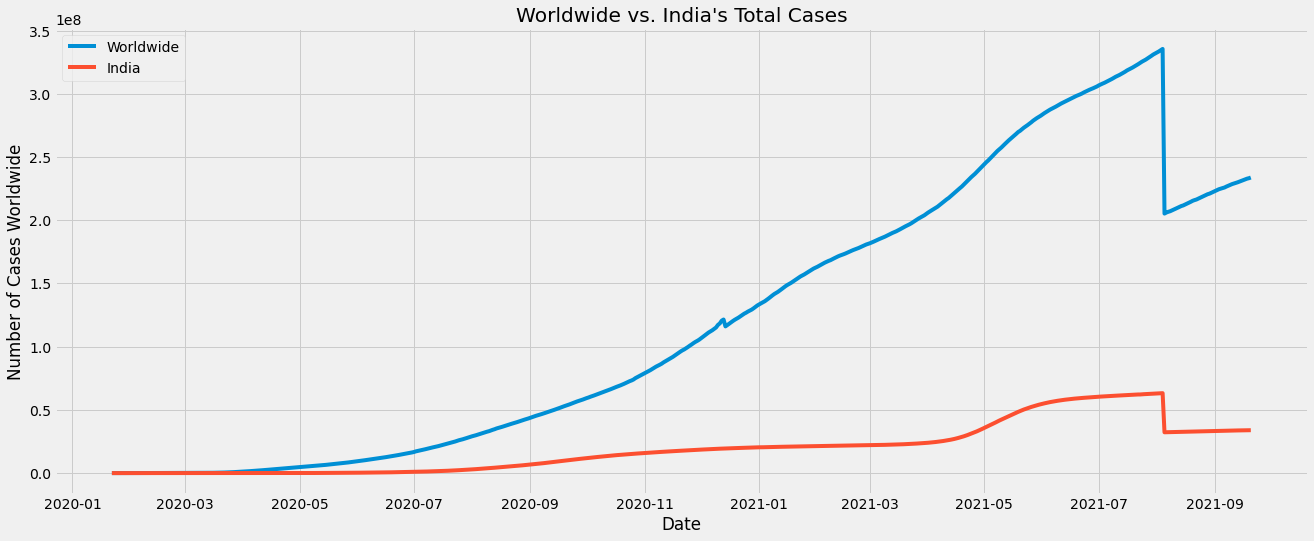

In [21]:
ind_df = df[df['Country']=='India'].groupby('Date').sum()

fig=plt.figure(figsize=(20,8))
ax=fig.add_subplot(111)
ax.plot(worldwide_df[['Total Cases']],label='Worldwide')
ax.plot(ind_df[['Total Cases']],label='India')

ax.set_xlabel('Date')
ax.set_ylabel('Number of Cases Worldwide')
ax.title.set_text("Worldwide vs. India's Total Cases")
plt.legend(loc='upper left')
plt.show()

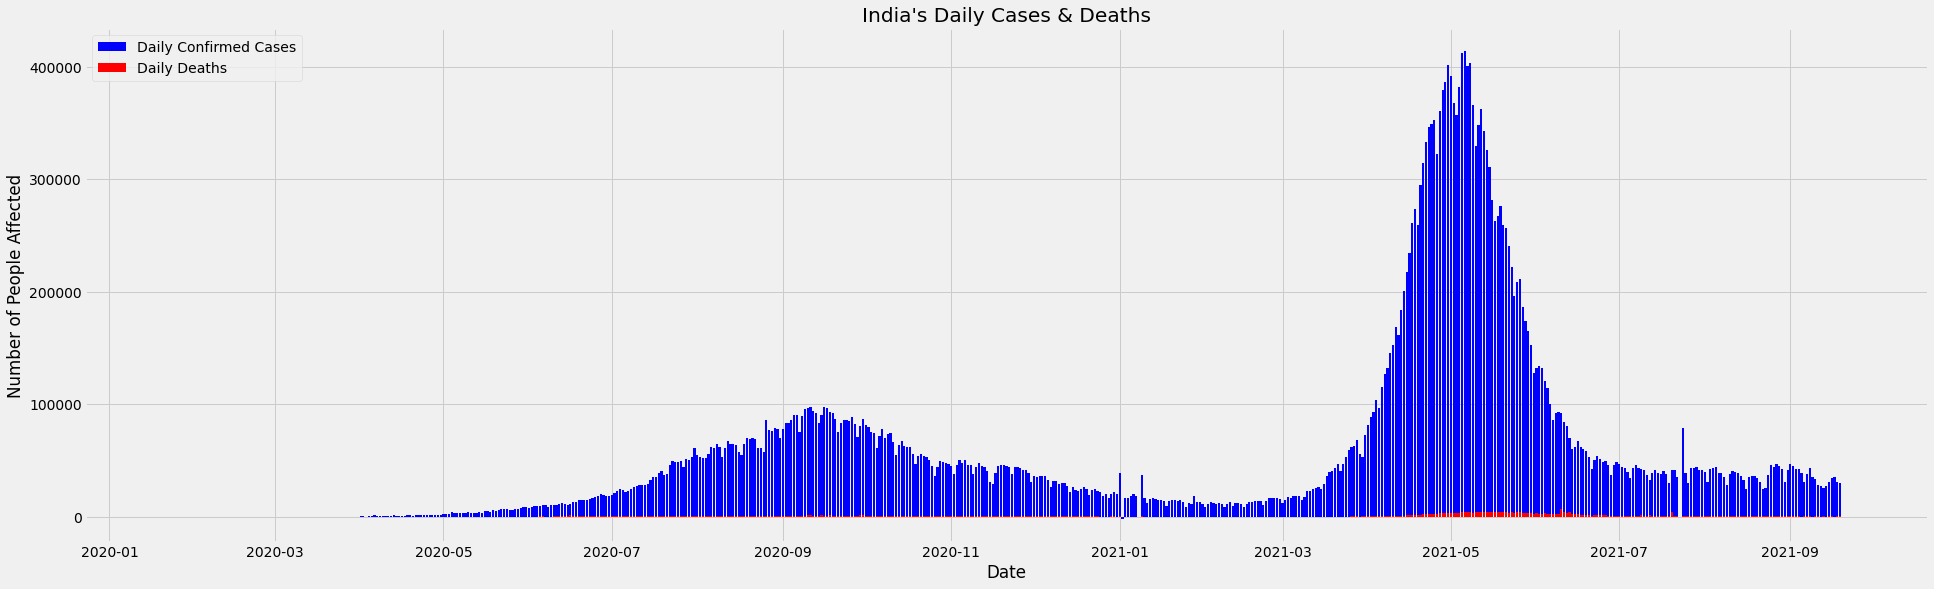

In [36]:
# India's Daily cases and Deaths

ind_df['Daily Confirmed'] = ind_df['Confirmed'].sub(ind_df['Confirmed'].shift())
ind_df['Daily Deaths'] = ind_df['Deaths'].sub(ind_df['Deaths'].shift())

fig=plt.figure(figsize=(100,30))
ax=fig.add_subplot(331)

ax.bar(ind_df['Date'],ind_df['Daily Confirmed'],color='blue',label="Daily Confirmed Cases")
ax.bar(ind_df['Date'],ind_df['Daily Deaths'],color='red',label="Daily Deaths")

ax.set_xlabel('Date')
ax.set_ylabel("Number of People Affected")
ax.title.set_text("India's Daily Cases & Deaths")
plt.legend(loc='upper left')
plt.show()